#### k-NN regression

In [1]:
#載入資料
import pandas as pd  
import numpy as np  
data = pd.read_csv('iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
#分3個CLASS
setosa = data[:50]
versicolor = data[50:100]
virginica = data[100:]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [4]:
#split data and train
def fit_each_class(dataset):
    X = dataset.iloc[:,:3].values
    y = dataset.iloc[:,3].values
    Accuracy_with_K = []
    for k in range(1,16,2):
        MSE_list = []
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)#random split
            regressor = KNeighborsRegressor(n_neighbors=k,p = 2)#p=2 Euclidean
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            MSE_list.append(mean_squared_error(y_pred,y_test))
        Accuracy_with_K.append(sum(MSE_list) / 10)
    return Accuracy_with_K

In [5]:
#each class
setosa_MSE = fit_each_class(setosa)
versicolor_MSE = fit_each_class(versicolor)
virginica_MSE = fit_each_class(virginica)

print(setosa_MSE)
print(versicolor_MSE)
print(virginica_MSE)

[0.014733333333333331, 0.012851851851851854, 0.014968, 0.011443537414965987, 0.010682304526748971, 0.01426556473829201, 0.010503747534516765, 0.014823407407407405]
[0.027333333333333338, 0.0206962962962963, 0.023434666666666666, 0.020801360544217693, 0.01766913580246914, 0.01832837465564738, 0.01688678500986194, 0.017209185185185185]
[0.09113333333333332, 0.06304444444444444, 0.062247999999999984, 0.06814693877551022, 0.06682798353909465, 0.06616694214876032, 0.06636291913214987, 0.06751940740740739]


In [6]:
K = [1,3,5,7,9,11,13,15]

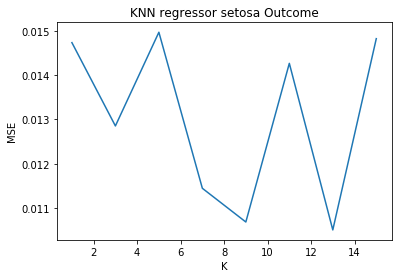

In [8]:
#plot
from matplotlib import pyplot as plt 
plt.title("KNN regressor setosa Outcome") 
plt.xlabel("K") 
plt.ylabel("MSE") 
plt.plot(K,setosa_MSE) 
#plt.savefig('KNN_regressor_setosa_Outcome.png')
plt.show()

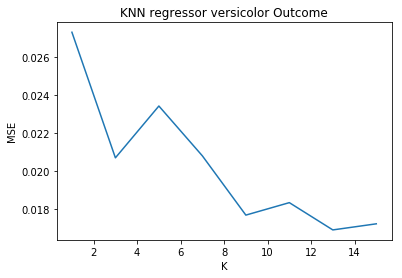

In [9]:
plt.title("KNN regressor versicolor Outcome") 
plt.xlabel("K") 
plt.ylabel("MSE") 
plt.plot(K,versicolor_MSE) 
#plt.savefig('KNN_regressor_versicolor_Outcome.png')
plt.show()

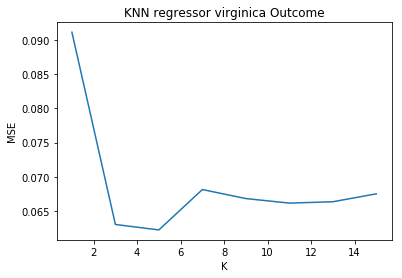

In [10]:
plt.title("KNN regressor virginica Outcome") 
plt.xlabel("K") 
plt.ylabel("MSE") 
plt.plot(K,virginica_MSE) 
#plt.savefig('KNN_regressor_virginica_Outcome.png')
plt.show()

 根據上面結果，linear regression 表現較好